# <font color = blue> Problem Statement
Sales of products in four different regions is given in 'BuyerRatio.csv' for males and females. Find if male-female buyer rations are similar across regions.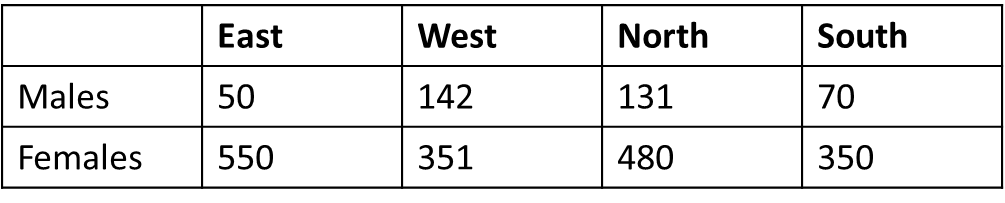

## <font color = purple> 1. Understanding Business Problem
    To find out if male-female buyer rations are similar across above 4 regions

## <font color = purple> 2. Given Data
    Level of Significance → α  = 0.05
    (Since α is not given, considering it as 5% level of Significance. In other words 95% level of Confidence)
    Null hypothesis       → H0 = All proportions are equeal
    Alternate Hypothesis  → Ha = Not all proportions are equeal

## <font color = purple> 3. Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

## <font color = purple> 4. Import Data

In [3]:
sales_data = pd.read_csv('BuyerRatio.csv')
sales_data

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


## <font color = purple> 5. Perform Initial Analysis

In [4]:
# to know the data type of each feature
sales_data.dtypes

Observed Values    object
East                int64
West                int64
North               int64
South               int64
dtype: object

In [5]:
# renaming column 'Observed Values' to 'Values'
sales_data.rename(columns={'Observed Values':'Values'},inplace=True)
sales_data

,Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [6]:
type(sales_data)

pandas.core.frame.DataFrame

In [7]:
# Since 'Observed Values' is a categorical feature lets apply 'Label ENcoder' to convert it into numbers.

In [8]:
label_encoder = preprocessing.LabelEncoder()

In [9]:
# applying label encoder on 'Values' column
sales_data['Values'] = label_encoder.fit_transform(sales_data['Values'])
sales_data

,Values,East,West,North,South
0,1,50,142,131,70
1,0,435,1523,1356,750


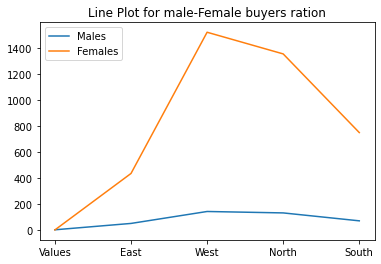

In [10]:
y1 = sales_data.iloc[0]
y2 = sales_data.iloc[1]
plt.plot(y1, label = 'Males')
plt.plot(y2, label = 'Females')
plt.legend(loc='upper left')
plt.title('Line Plot for male-Female buyers ration')
plt.show()

## <font color = purple> 6. Hypothesis Formulation
    HO = All proportions are equal.
    H1 = Not all proportions are equal.
    α  = 0.05

## <font color = purple> 7. Perform Hypothesis Testing

### <font color = purple> *Since there are more than 2 variables, we will perform Chi-Square test*

In [11]:
chi2,p_val_sales,dof_sales,expected_sales  = chi2_contingency(sales_data)

In [12]:
p_val_sales

0.018035974243023764

In [13]:
print(round(p_val_sales,4))

0.018


In [29]:
print('Chi-Square test   :',chi2)
print('P-value           :',p_val_sales)
print('Degrees of Freedom:',dof_sales)
print('Expected Sales    :\n',expected_sales)

Chi-Square test   : 1.595945538661058
P-value           : 0.6603094907091882
Degrees of Freedom: 3
Expected Sales    :
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


### <font color = purple> *In above data 'Values' column is also considered which is affecting our P-value*

In [15]:
sales_data

,Values,East,West,North,South
0,1,50,142,131,70
1,0,435,1523,1356,750


In [16]:
# Lets create a copy of 'sales_data' and remove 'Values' column from newly created data

In [17]:
sales_data_copy = sales_data.copy

In [18]:
sales_data_copy

<bound method NDFrame.copy of    Values  East  West  North  South
0       1    50   142    131     70
1       0   435  1523   1356    750>

In [19]:
# To avoid the error above, always use () with the method

In [20]:
sales_data_copy = sales_data.copy()

In [21]:
sales_data_copy

,Values,East,West,North,South
0,1,50,142,131,70
1,0,435,1523,1356,750


In [22]:
sales_data_copy = sales_data_copy.drop(columns=['Values'])
sales_data_copy

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [23]:
chi2,p_val_sales,dof_sales,expected_sales  = chi2_contingency(sales_data_copy)

In [24]:
p_val_sales

0.6603094907091882

In [25]:
print(round(p_val_sales,4))

0.6603


In [26]:
print('Chi-Square test   :',chi2)
print('P-value           :',p_val_sales)
print('Degrees of Freedom:',dof_sales)
print('Expected Sales    :\n',expected_sales)

Chi-Square test   : 1.595945538661058
P-value           : 0.6603094907091882
Degrees of Freedom: 3
Expected Sales    :
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


## <font color = purple> 8. Conclusion

In [27]:
# checking if 'α > P-value' or 'α < P-value'

In [28]:
if p_val_sales > 0.05:
    print('At 5% level of significance, we cannot reject the Null Hypothesis and we can say that all proportions are equeal.')
else:
    print('At 5% level of significance, we can reject the Null Hypothesis and we can say that not all proportions are equeal.')

At 5% level of significance, we cannot reject the Null Hypothesis and we can say that all proportions are equeal.
